In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data
T = iris.target
print("X (data) shape: {}".format(X.shape))
print("T (labels) shape: {}".format(X.shape))

X (data) shape: (150, 4)
T (labels) shape: (150, 4)


Visualize Iris Data

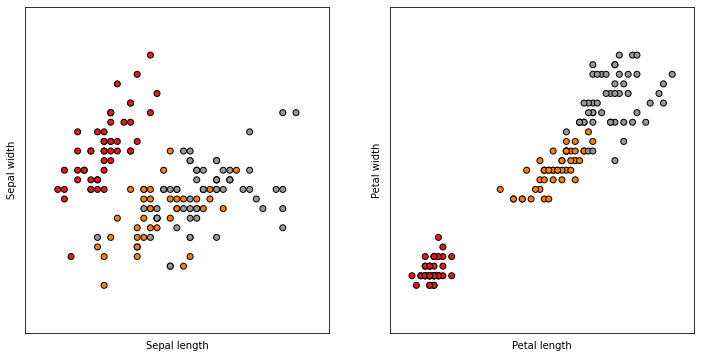

In [4]:
plt.figure(figsize=(12,6))
for i in range(2):
    x_min, x_max = X[:, 2*i].min() - .5, X[:, 2*i].max() + .5
    y_min, y_max = X[:, 2*i+1].min() - .5, X[:, 2*i+1].max() + .5

    plt.subplot(1,2,i+1)
    # Plot the training points
    plt.scatter(X[:, 2*i], X[:, 2*i+1], c=T, cmap=plt.cm.Set1,
                edgecolor='k')
    plt.xlabel('Sepal length' if i==0 else 'Petal length')
    plt.ylabel('Sepal width'  if i==0 else 'Petal width')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

k-means

In [5]:
def kmeans(X, K=2, maxiter=100):
    """
        Args:
            X (np.ndarray): Data formatted as a NumPy array.
            
            K (int): Number of clusters
            
            maxiter (int): Max iteration for minmizing error
            
    """
    N = X.shape[0] # Number of samples
    
    # TODO(1): Select initial centers by randomly selecting K data indexes from our data X
    cidx = np.random.choice(N, K, replace=False)
    centers = X[cidx, :]
    classes = np.zeros(N)
    
    E = []  # error log
    
    # repeat until convergence or up to maxiter
    for step in range(maxiter):

        # Allows NumPy to broadcast our centers to match the shape of X
        broadcast_centers = centers[:,np.newaxis,:]


        # TODO (2)
        sqr_diff = (X - broadcast_centers)**2
        # TODO (3)
        distance_err = np.sum(sqr_diff, axis=2)
        
        # Get the classes/cluster label for each smaple by taking the class
        # with the smallest error or distance.
        classes = np.argmin(distance_err, axis=0)
        
        # Record the all min errors for each sample 
        # (min is equivalent to indicator variable here).
        min_err = np.min(distance_err, axis=0)
        # Sum all min errors to get total error.
        error = np.sum(min_err)
        
        # Convergence check
        if len(E) > 0 and np.abs(error - E[-1]) < np.finfo(float).eps:
            print("Converged at {}".format(step))
            break
        
        # TODO(4):
        for k in range(K):
            centers[k,:] = X[classes==k,:].mean(axis=0)
        
        # Add summed min error to error tracked
        E.append(error)

        # Print statements for debugging
        if step == 0:
            print("{:-^60s}".format("Debug Shapes"))
            print("centers shape (K, F): {}".format(centers.shape))
            print("braodcast_centers shape (K, 1, F): {}".format(broadcast_centers.shape))
            print("sqr_diff shape (K, N, F): {}".format(sqr_diff.shape))
            print("distance_err shape (K, N): {}".format(distance_err.shape))
            print("classess shape (N,): {}".format(classes.shape))
            print("-"*60)
            
    return centers, classes, E

In [6]:
# TODO (1)
mus, ys, errs = kmeans(X)

------------------------Debug Shapes------------------------
centers shape (K, F): (2, 4)
braodcast_centers shape (K, 1, F): (2, 1, 4)
sqr_diff shape (K, N, F): (2, 150, 4)
distance_err shape (K, N): (2, 150)
classess shape (N,): (150,)
------------------------------------------------------------
Converged at 7


Visualize Results

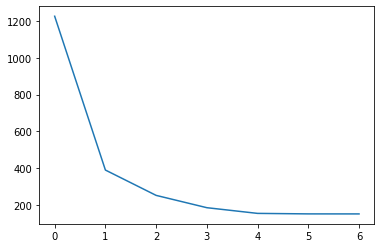

In [7]:
plt.plot(errs)

In [8]:
ys

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
human_mus  = pd.DataFrame(mus, columns=iris.feature_names)
human_mus.index = ['cluster {} means'.format(k+1) for k in range(len(human_mus))]
human_mus

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster 1 means,6.301031,2.886598,4.958763,1.695876
cluster 2 means,5.005660,3.369811,1.560377,0.290566


In [10]:
def plot_iris_cluster(X, y, mu, dim=2):
    """
        Plot the Itis data with based on passed labels
        
        Args:
            X (np.ndarray): Data formatted as a NumPy array
            y (np.ndarray): Vector of labels to plot each cluster.
            m (float): The center of each cluster
            dim (int): option to plot multidimensional figures (for sepal and petal)
    """

    k = mu.shape[0]
    plt.figure(figsize=(12,6))
    for i in range(dim):
        x_min, x_max = X[:, 2*i].min() - .5, X[:, 2*i].max() + .5
        y_min, y_max = X[:, 2*i+1].min() - .5, X[:, 2*i+1].max() + .5

        plt.subplot(1,2,i+1)
        # Plot the training points
        plt.scatter(X[:, 2*i], X[:, 2*i+1], c=y, cmap=plt.cm.Set1,
                    edgecolor='k')
        
        # plot the center
        plt.scatter(mu[:, 2*i], mu[:, 2*i+1], c=range(k), marker='s', 
                    cmap=plt.cm.bwr, edgecolor='y')
        
        plt.xlabel('Sepal length' if i==0 else 'Petal length')
        plt.ylabel('Sepal width'  if i==0 else 'Petal width')

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())

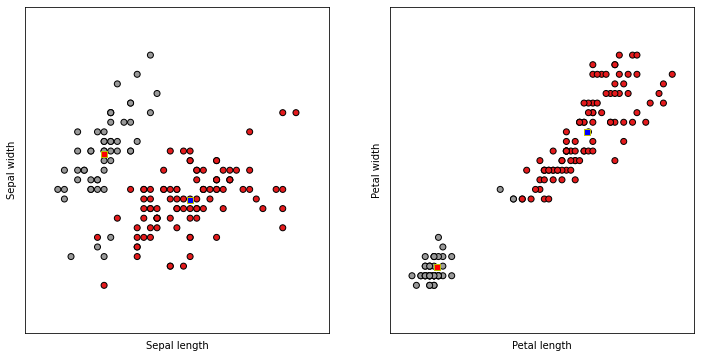

In [11]:
plot_iris_cluster(X, ys, mus)

------------------------Debug Shapes------------------------
centers shape (K, F): (5, 4)
braodcast_centers shape (K, 1, F): (5, 1, 4)
sqr_diff shape (K, N, F): (5, 150, 4)
distance_err shape (K, N): (5, 150)
classess shape (N,): (150,)
------------------------------------------------------------
Converged at 4


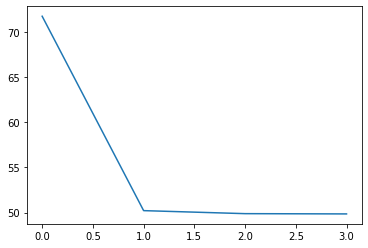

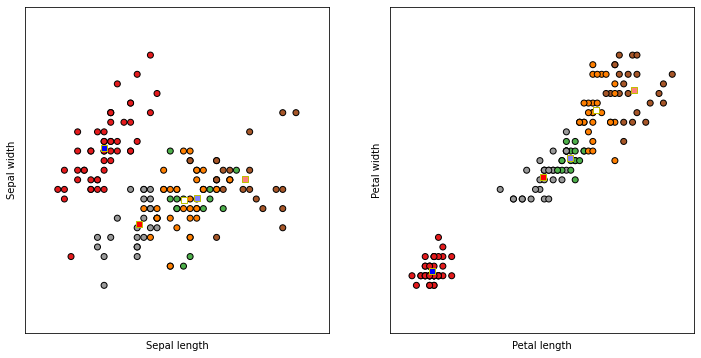

In [12]:
# TODO (1): Run kmeans() now with five clusters.
mus, ys, errs = kmeans(X, K=5)

plt.plot(errs)
plot_iris_cluster(X, ys, mus)

------------------------Debug Shapes------------------------
centers shape (K, F): (3, 4)
braodcast_centers shape (K, 1, F): (3, 1, 4)
sqr_diff shape (K, N, F): (3, 150, 4)
distance_err shape (K, N): (3, 150)
classess shape (N,): (150,)
------------------------------------------------------------
Converged at 12


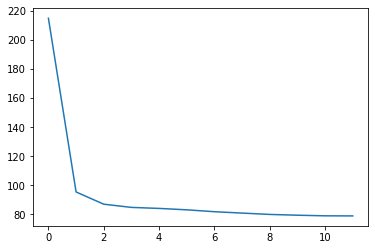

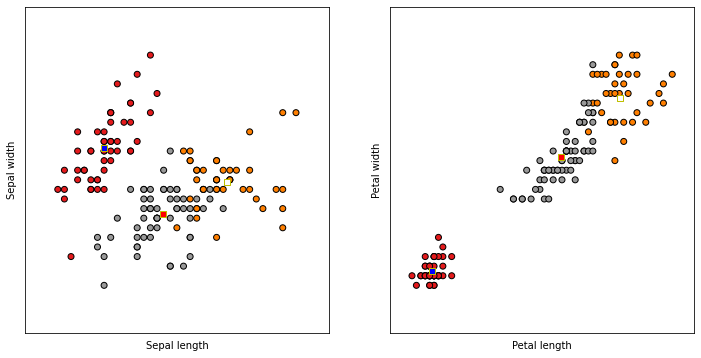

In [13]:
# TODO (2): Run kmeans() now with three clusters. 
mus, ys, errs = kmeans(X, K=3)

plt.plot(errs)
plot_iris_cluster(X, ys, mus)

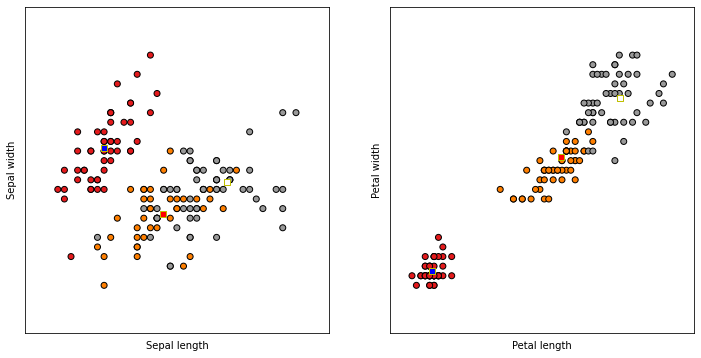

In [14]:
#TODO (1)
plot_iris_cluster(X, T, mus)

In [15]:
acc = np.sum(ys==T)/X.shape[0]
print("k-means accuracy: {:.5f}".format(acc))

k-means accuracy: 0.44667


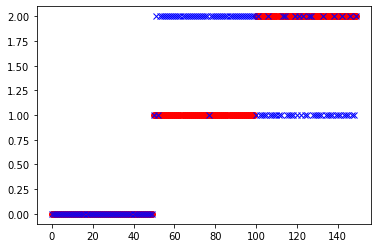

In [16]:
plt.plot(T, 'ro')
plt.plot(ys, 'bx');

In [17]:
def pca(X):
    """ principal component analysis
    
        parameter
        ---------
        X        ndarray (N x D)
                 input data
                 
        return
        ------
        @U       ndarray (N x D)
                 left singular vectors
        @S       ndarray (D x D)
                 diagonal matrix with square root of eigenvalues
        @V       ndarray (D x D)
                 right singular vectors
        @mu      ndarray (D,)
                 1d vector of column means 
    """
    # TODO (1)
    means = np.mean(X, axis=0)
    # TODO (2)
    Xc = X - means
    # TODO (3)
    U, S, V = np.linalg.svd(Xc)
    
    return U, S, V.T, means

In [18]:
Xs = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
U, L, V, m = pca(Xs)

In [19]:
U

array([[-1.08239531e-01, -4.09957970e-02,  2.72186462e-02, ...,
         5.43380310e-02,  1.96438400e-03,  2.46978090e-03],
       [-9.94577561e-02,  5.75731483e-02,  5.00034005e-02, ...,
         5.12936114e-03,  8.48544595e-02,  5.83496936e-03],
       [-1.12996303e-01,  2.92000319e-02, -9.42089147e-03, ...,
         2.75184277e-02,  1.78604309e-01,  1.49419118e-01],
       ...,
       [ 7.27030413e-02, -2.29793601e-02, -3.84023516e-02, ...,
         9.89532683e-01, -1.25488246e-02, -7.17729676e-04],
       [ 6.56112167e-02, -8.63643414e-02, -1.98939364e-01, ...,
        -1.41206665e-02,  9.52049996e-01, -2.32048811e-02],
       [ 4.59137323e-02,  2.07800179e-03, -1.12588405e-01, ...,
        -8.30595907e-04, -2.19201906e-02,  9.77300244e-01]])

In [20]:
L

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [21]:
V

array([[ 0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [-0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [22]:
m

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [23]:
Xr = X[:, :2]

------------------------Debug Shapes------------------------
centers shape (K, F): (3, 2)
braodcast_centers shape (K, 1, F): (3, 1, 2)
sqr_diff shape (K, N, F): (3, 150, 2)
distance_err shape (K, N): (3, 150)
classess shape (N,): (150,)
------------------------------------------------------------
Converged at 6


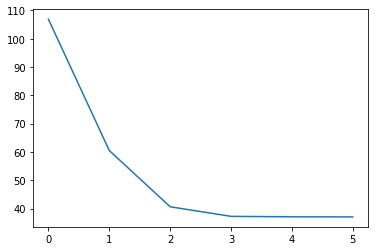

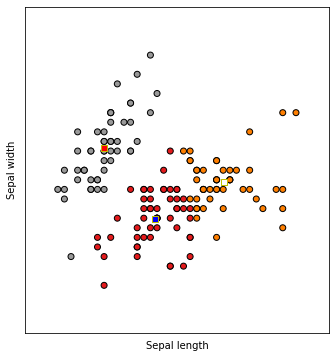

In [24]:
# TODO 1
mus, ys, errs = kmeans(Xr, K=3)

plt.plot(errs)
plot_iris_cluster(Xr, ys, mus, dim=1)

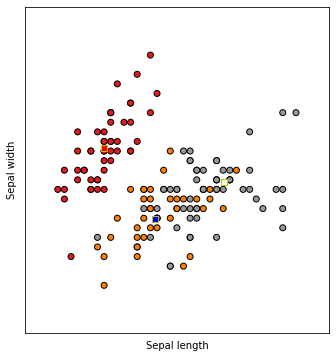

In [25]:
plot_iris_cluster(Xr, T, mus, dim=1)

In [26]:
acc = np.sum(ys==T)/X.shape[0]
print("k-means accuracy: {:.5f}".format(acc))

k-means accuracy: 0.08000


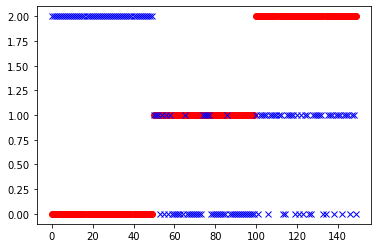

In [27]:
plt.plot(T, 'ro')
plt.plot(ys, 'bx');